# $$Pathrise Project$$

## Step-1 : A little business understanding!

Pathrise is an online program that provides 1-on-1 mentorship, training, and advice to help job seekers get the best possible jobs in tech. Every two weeks, Pathrise welcomes a new cohort of fellows. If a candidate is interested in joining our program and successfully passes all stages of our admission process, they receive an offer to join Pathrise and become a fellow. The first 2 weeks in the program are called a free trial period and a fellow can withdraw within this free trial period without any penalty. After 2 weeks, a fellow needs to sign an ISA (Income Share Agreement) with us if they want to stay in the program. The entire program lasts up to a year, including 8 weeks of the core curriculum. If a fellow is unable to find a job within a year after joining Pathrise, his/her contract is terminated. However, there might be some exceptions. For instance, if someone was on a break, we may extend their contract for the period of the break. 

On average, for fellows who stay with us after their free trial period, it takes about 4 months to receive a final job offer. However, there is a lot of variation in fellows’ outcomes. Being able to predict how fast every single fellow is going to find a job is crucial for our business. In this exercise we provide you with a sample of information we collected from our fellows from the moment they joined our program. Please don’t expect this data set to be perfect, it never happens in the real world. 
 
The main goal of your analysis is to derive insights around 
* 1-if a fellow will ultimately be placed at a company ------> target is <code>placed</code>
* 2-how long until a placement can be expected ------> target is <code>program_duration_days</code>


* id 
* pathrise_status
* primary_track
* cohort_tag
* program_duration_days
* placed
* employment_status
* highest_level_of_education
* length_of_job_search
* biggest_challenge_in_search
* professional_experience
* work_authorization_status
* number_of_interviews
* number_of_applications
* gender
* race

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

!pip install missingno
import missingno as msno

In [2]:
#This code sets the maximum number of columns that Pandas will display when printing a DataFrame to be unlimited.
pd.set_option('display.max_columns', None)

#This code sets the maximum width of the columns in a Pandas DataFrame to be unlimited
pd.set_option('display.max_colwidth', None)

## Step-2 : Exploring raw data

In [3]:
df = pd.read_excel("Data_Pathrise.xlsx")

In [4]:
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


In [5]:
df.head(5)

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [7]:
print(df.columns)

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')


In [8]:
df.dtypes

id                               int64
pathrise_status                 object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
dtype: object

<AxesSubplot:xlabel='placed', ylabel='count'>

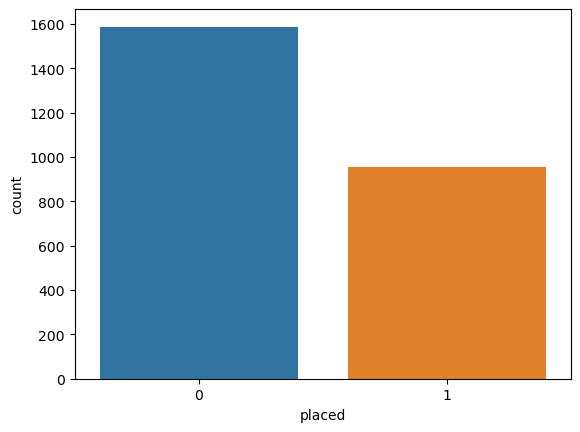

In [9]:
#checking dataset balance
sns.countplot(x='placed',data=df)

The plot above shows that dataset is not balanced.

In [10]:
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [11]:
df.shape

(2544, 16)

## Step-3 :Cleaning data and Removing unnecessary features

#### First we are going to remove outliers.

In [12]:
# Remove outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

df_cleaned = df[~outliers]

# Print original and cleaned dataset shape
print("Original Shape:", df.shape)
print("Cleaned Shape:", df_cleaned.shape)

Original Shape: (2544, 16)
Cleaned Shape: (2293, 16)


C:\Users\ilnaz\AppData\Local\Temp\ipykernel_8912\311196983.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


#### dropping id

In [13]:
df = df.drop("id", axis=1)
df

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   cohort_tag                   2536 non-null   object 
 3   program_duration_days        1928 non-null   float64
 4   placed                       2544 non-null   int64  
 5   employment_status            2315 non-null   object 
 6   highest_level_of_education   2486 non-null   object 
 7   length_of_job_search         2470 non-null   object 
 8   biggest_challenge_in_search  2520 non-null   object 
 9   professional_experience      2322 non-null   object 
 10  work_authorization_status    2260 non-null   object 
 11  number_of_interviews         2326 non-null   float64
 12  number_of_applications       2544 non-null   int64  
 13  gender            

#### dropping  <code>Active</code>,<code>Deferred</code>,<code>MIA</code> and <code>Break</code> indexes from <code>pathrise_status</code> 

In [15]:
df.drop(df[(df['pathrise_status'] == 'Active') | (df['pathrise_status'] == 'Deferred')].index, axis=0, inplace=True)
df.drop(df[(df['pathrise_status'] == 'MIA') | (df['pathrise_status'] == 'Break')].index, axis=0,  inplace=True)

In [16]:
df.shape

(1894, 15)

#### dropping <code>pathrise_status</code> and <code>cohort_tag</code>

In [17]:
df.drop(['cohort_tag','pathrise_status'] ,axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 2 to 2543
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1894 non-null   object 
 1   program_duration_days        1894 non-null   float64
 2   placed                       1894 non-null   int64  
 3   employment_status            1717 non-null   object 
 4   highest_level_of_education   1854 non-null   object 
 5   length_of_job_search         1829 non-null   object 
 6   biggest_challenge_in_search  1874 non-null   object 
 7   professional_experience      1738 non-null   object 
 8   work_authorization_status    1674 non-null   object 
 9   number_of_interviews         1723 non-null   float64
 10  number_of_applications       1894 non-null   int64  
 11  gender                       1527 non-null   object 
 12  race                         1881 non-null   object 
dtypes: float64(2), int

## Step-4 :challenging with missing values

In [18]:
#number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

gender                         367
work_authorization_status      220
employment_status              177
number_of_interviews           171
professional_experience        156
length_of_job_search            65
highest_level_of_education      40
biggest_challenge_in_search     20
race                            13
primary_track                    0
program_duration_days            0
placed                           0
number_of_applications           0
dtype: int64

In [19]:
# the number of rows that have missing values
df[df.isnull().any(axis=1)]

,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
24,Design,0.0,0,Contractor,NaN,1-2 months,Hearing back on my applications,3-4 years,Green Card,0.0,20,NaN,East Asian or Asian American
28,PSO,0.0,0,Employed Full-Time,Bachelor's Degree,6 months to a year,Hearing back on my applications,Less than one year,Citizen,NaN,45,Male,Non-Hispanic White or Euro-American
39,SWE,83.0,1,Employed Full-Time,Master's Degree,3-5 months,Getting past final round interviews,5+ years,F1 Visa/OPT,NaN,15,Male,Native American or Alaskan Native
43,PSO,13.0,0,Unemployed,Bachelor's Degree,6 months to a year,Getting past mid-stage interviews,3-4 years,Citizen,NaN,60,Female,East Asian or Asian American
55,SWE,44.0,0,Contractor,Bachelor's Degree,3-5 months,Technical interviewing,NaN,Citizen,1.0,200,Female,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,SWE,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Technical interviewing,Less than one year,NaN,5.0,45,Female,Non-Hispanic White or Euro-American
2531,SWE,310.0,1,Unemployed,Doctorate or Professional Degree,Less than one month,Technical skills,NaN,F1 Visa/OPT,0.0,6,NaN,East Asian or Asian American
2533,Design,33.0,1,NaN,Bachelor's Degree,1-2 months,Hearing back on my applications,3-4 years,F1 Visa/OPT,0.0,9,Male,Non-Hispanic White or Euro-American
2535,PSO,0.0,0,Employed Full-Time,Master's Degree,NaN,Figuring out which jobs to apply for,3-4 years,Citizen,0.0,20,NaN,South Asian or Indian American


<AxesSubplot:>

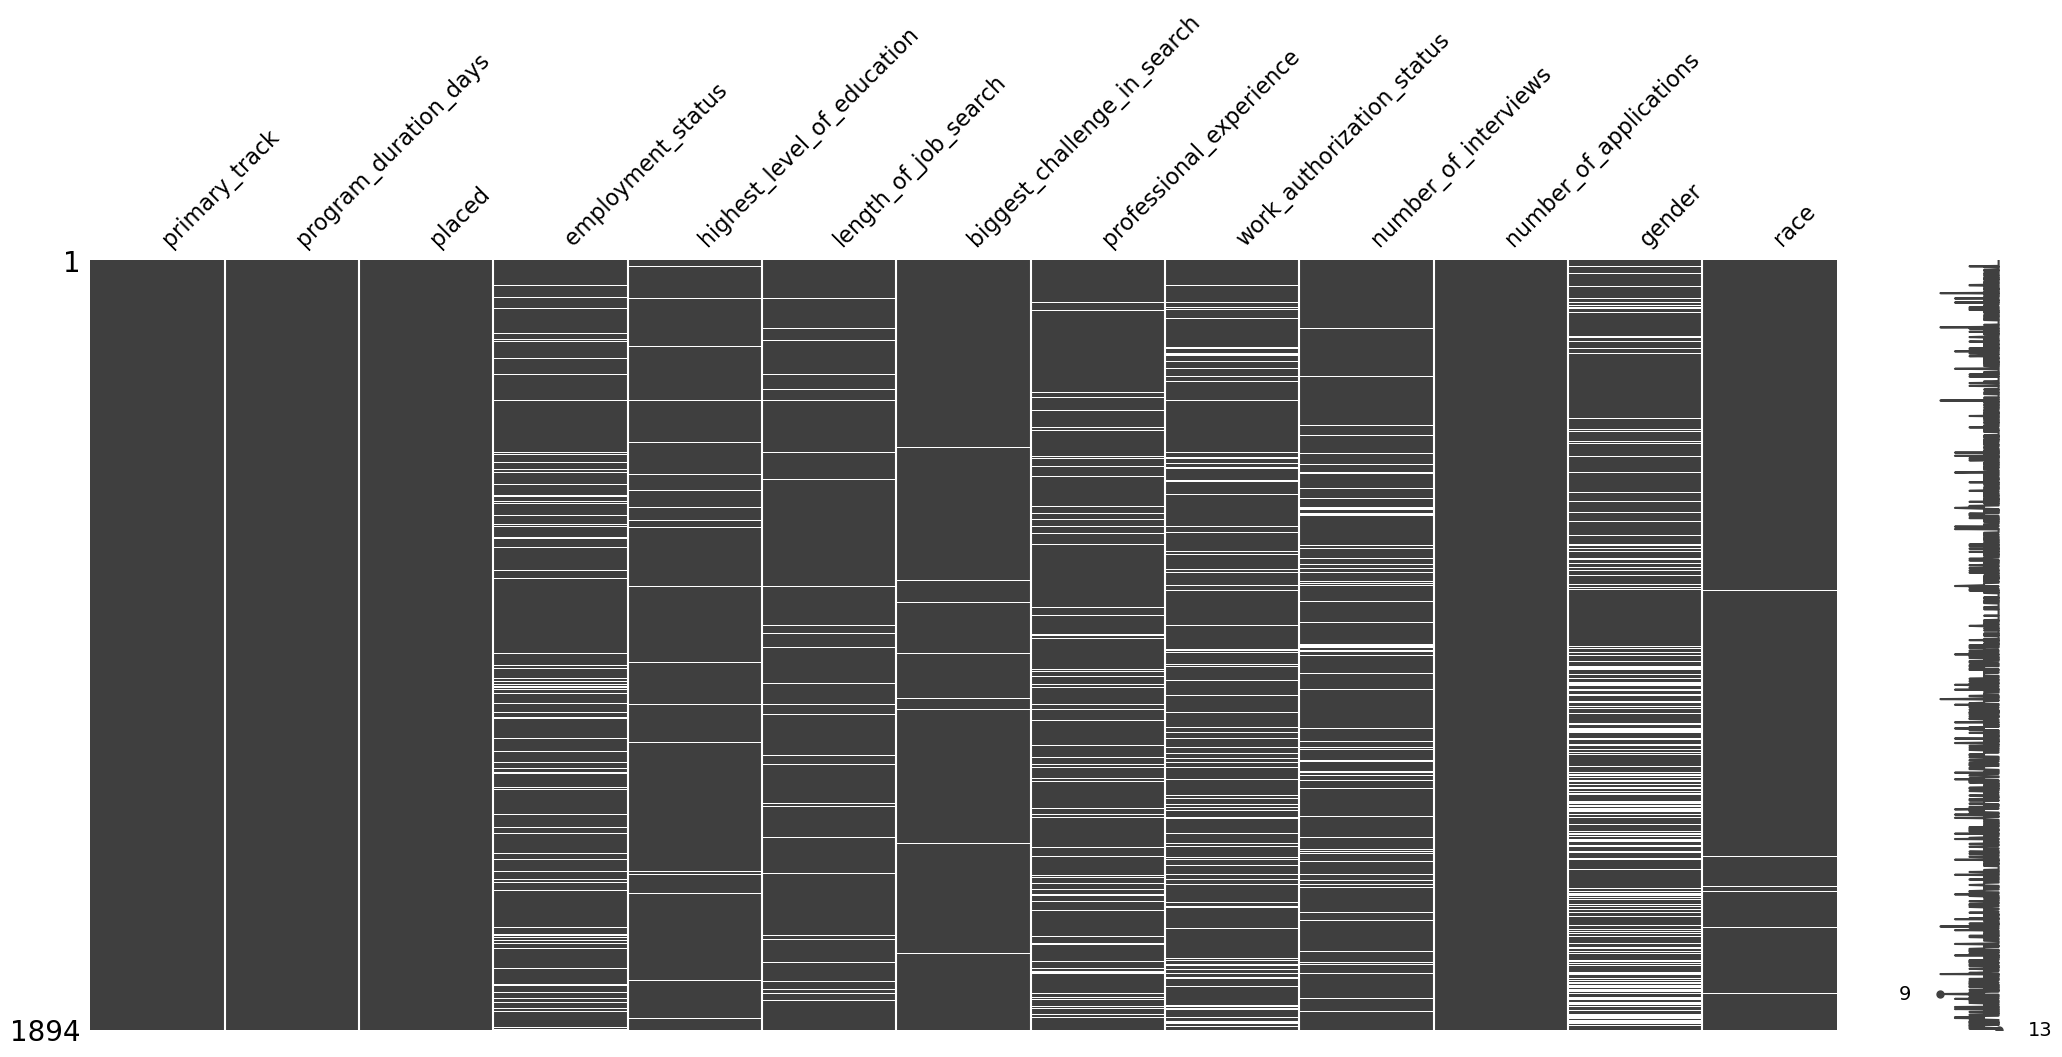

In [20]:
# showing missing values in columns
msno.matrix(df)

### gender

In [21]:
df['gender'].value_counts()

Male                        1114
Female                       400
Decline to Self Identify      10
Non-Binary                     3
Name: gender, dtype: int64

In [22]:
df['gender']=df['gender'].replace(np.nan,'Decline to Self Identify', inplace=True)

In [23]:
df['gender'].value_counts()

Series([], Name: gender, dtype: int64)

### work_authorization_status

In [24]:
df['work_authorization_status'].value_counts()

Citizen           817
F1 Visa/OPT       478
Green Card        138
F1 Visa/CPT        96
Other              80
H1B                36
Canada Citizen     20
STEM OPT            5
Not Authorized      4
Name: work_authorization_status, dtype: int64

In [25]:
df['work_authorization_status']=df['work_authorization_status'].replace(np.nan,'Citizen',inplace=True )

In [26]:
df['work_authorization_status'].value_counts()

Series([], Name: work_authorization_status, dtype: int64)

### employment_status  

In [27]:
df['employment_status '].value_counts()

Student               567
Unemployed            493
Employed Full-Time    325
Employed Part-Time    199
Contractor            133
Name: employment_status , dtype: int64

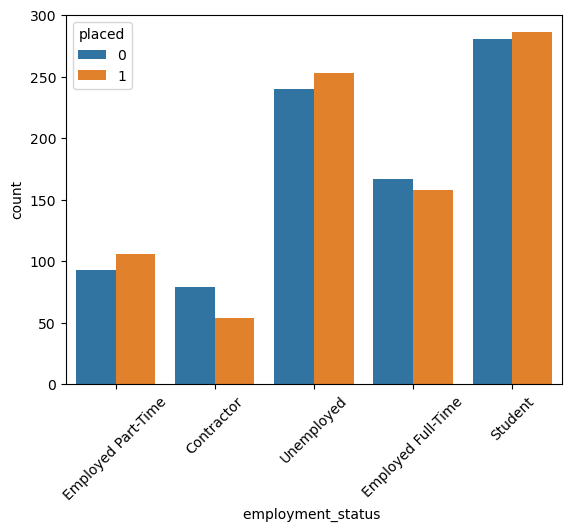

In [28]:
sns.countplot(x='employment_status ',data=df,hue='placed')
plt.xticks(rotation=45)
plt.show()

In [29]:
df['employment_status '].replace(np.nan, 'Student', inplace=True)

In [30]:
df['employment_status '].value_counts()

Student               744
Unemployed            493
Employed Full-Time    325
Employed Part-Time    199
Contractor            133
Name: employment_status , dtype: int64

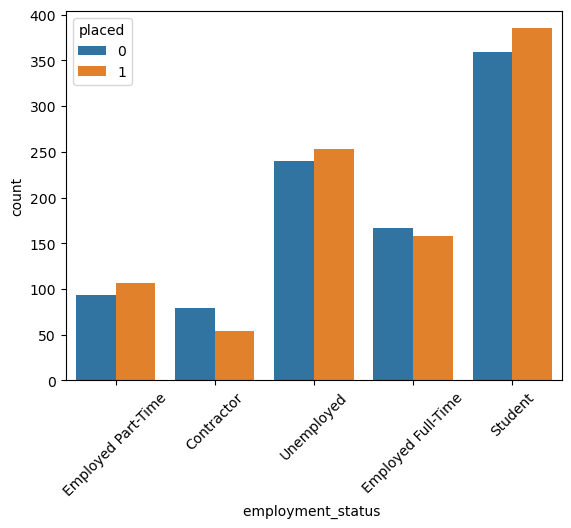

In [31]:
sns.countplot(x='employment_status ',data=df,hue='placed')
plt.xticks(rotation=45)
plt.show()

As you can see, by placing <code>Student</code>, the data distribution in this feature did not change, so we place the missing values ​​with this value.

### professional_experience

In [32]:
df['professional_experience'].value_counts()

1-2 years             630
Less than one year    469
3-4 years             438
5+ years              201
Name: professional_experience, dtype: int64

In [33]:
# Replace missing values in the 'professional_experience' column with new category 'Missed': 
#Replacing missing values with any category may alter the distribution of the data.
df['professional_experience'].fillna('Missed', inplace=True)

# Count the number of occurrences of each value in the 'professional_experience' column
value_counts = df['professional_experience'].value_counts()

In [34]:
df['professional_experience'].value_counts()

1-2 years             630
Less than one year    469
3-4 years             438
5+ years              201
Missed                156
Name: professional_experience, dtype: int64

### number_of_interviews

In [35]:
df['number_of_interviews']

2        0.0
3        5.0
4       10.0
5        5.0
6        0.0
        ... 
2535     0.0
2538     1.0
2539     4.0
2540     1.0
2543     3.0
Name: number_of_interviews, Length: 1894, dtype: float64

In [36]:
mean_1 = round(df['number_of_interviews'].mean(), 1)

In [37]:
mean_1

2.2

In [38]:
df['number_of_interviews'].replace(np.nan , mean_1 ,inplace=True )

In [39]:
df['number_of_interviews']

2        0.0
3        5.0
4       10.0
5        5.0
6        0.0
        ... 
2535     0.0
2538     1.0
2539     4.0
2540     1.0
2543     3.0
Name: number_of_interviews, Length: 1894, dtype: float64

In [40]:
set(df['number_of_interviews'])

{0.0,
 1.0,
 2.0,
 2.2,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0}

### length_of_job_search

In [41]:
df['length_of_job_search'].value_counts()

Less than one month    610
1-2 months             594
3-5 months             368
6 months to a year     169
Over a year             88
Name: length_of_job_search, dtype: int64

In [42]:
df['length_of_job_search'].fillna('missed',  inplace=True)

In [43]:
df['length_of_job_search'].value_counts()

Less than one month    610
1-2 months             594
3-5 months             368
6 months to a year     169
Over a year             88
missed                  65
Name: length_of_job_search, dtype: int64

### highest_level_of_education 

In [44]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   1015
Master's Degree                      599
Some College, No Degree              101
Doctorate or Professional Degree     100
GED or equivalent                     14
Some High School                      13
High School Graduate                  12
Name: highest_level_of_education, dtype: int64

In [45]:
df['highest_level_of_education'].fillna('missed', inplace=True)

In [46]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   1015
Master's Degree                      599
Some College, No Degree              101
Doctorate or Professional Degree     100
missed                                40
GED or equivalent                     14
Some High School                      13
High School Graduate                  12
Name: highest_level_of_education, dtype: int64

### biggest_challenge_in_search

In [47]:
df['biggest_challenge_in_search'].value_counts()

Hearing back on my applications         724
Getting past final round interviews     232
Technical interviewing                  219
Lack of relevant experience             173
Getting past mid-stage interviews       158
Getting past phone screens              142
Figuring out which jobs to apply for    129
Behavioral interviewing                  42
Resume gap                               30
Technical skills                         25
Name: biggest_challenge_in_search, dtype: int64

In [48]:
df['biggest_challenge_in_search'].fillna('missed', inplace=True)

In [49]:
df['biggest_challenge_in_search'].value_counts()

Hearing back on my applications         724
Getting past final round interviews     232
Technical interviewing                  219
Lack of relevant experience             173
Getting past mid-stage interviews       158
Getting past phone screens              142
Figuring out which jobs to apply for    129
Behavioral interviewing                  42
Resume gap                               30
Technical skills                         25
missed                                   20
Name: biggest_challenge_in_search, dtype: int64

### race  

In [50]:
df['race'].value_counts()

East Asian or Asian American                  690
South Asian or Indian American                414
Non-Hispanic White or Euro-American           407
Latino or Hispanic American                   119
Black, Afro-Caribbean, or African American     85
Two or More Races                              67
Middle Eastern or Arab American                52
Decline to Self Identify                       44
Native American or Alaskan Native               3
Name: race, dtype: int64

In [51]:
df['race']= df['race'].replace(np.nan , "Decline to Self Identify")

In [52]:
df['race'].value_counts()

East Asian or Asian American                  690
South Asian or Indian American                414
Non-Hispanic White or Euro-American           407
Latino or Hispanic American                   119
Black, Afro-Caribbean, or African American     85
Two or More Races                              67
Decline to Self Identify                       57
Middle Eastern or Arab American                52
Native American or Alaskan Native               3
Name: race, dtype: int64

<AxesSubplot:>

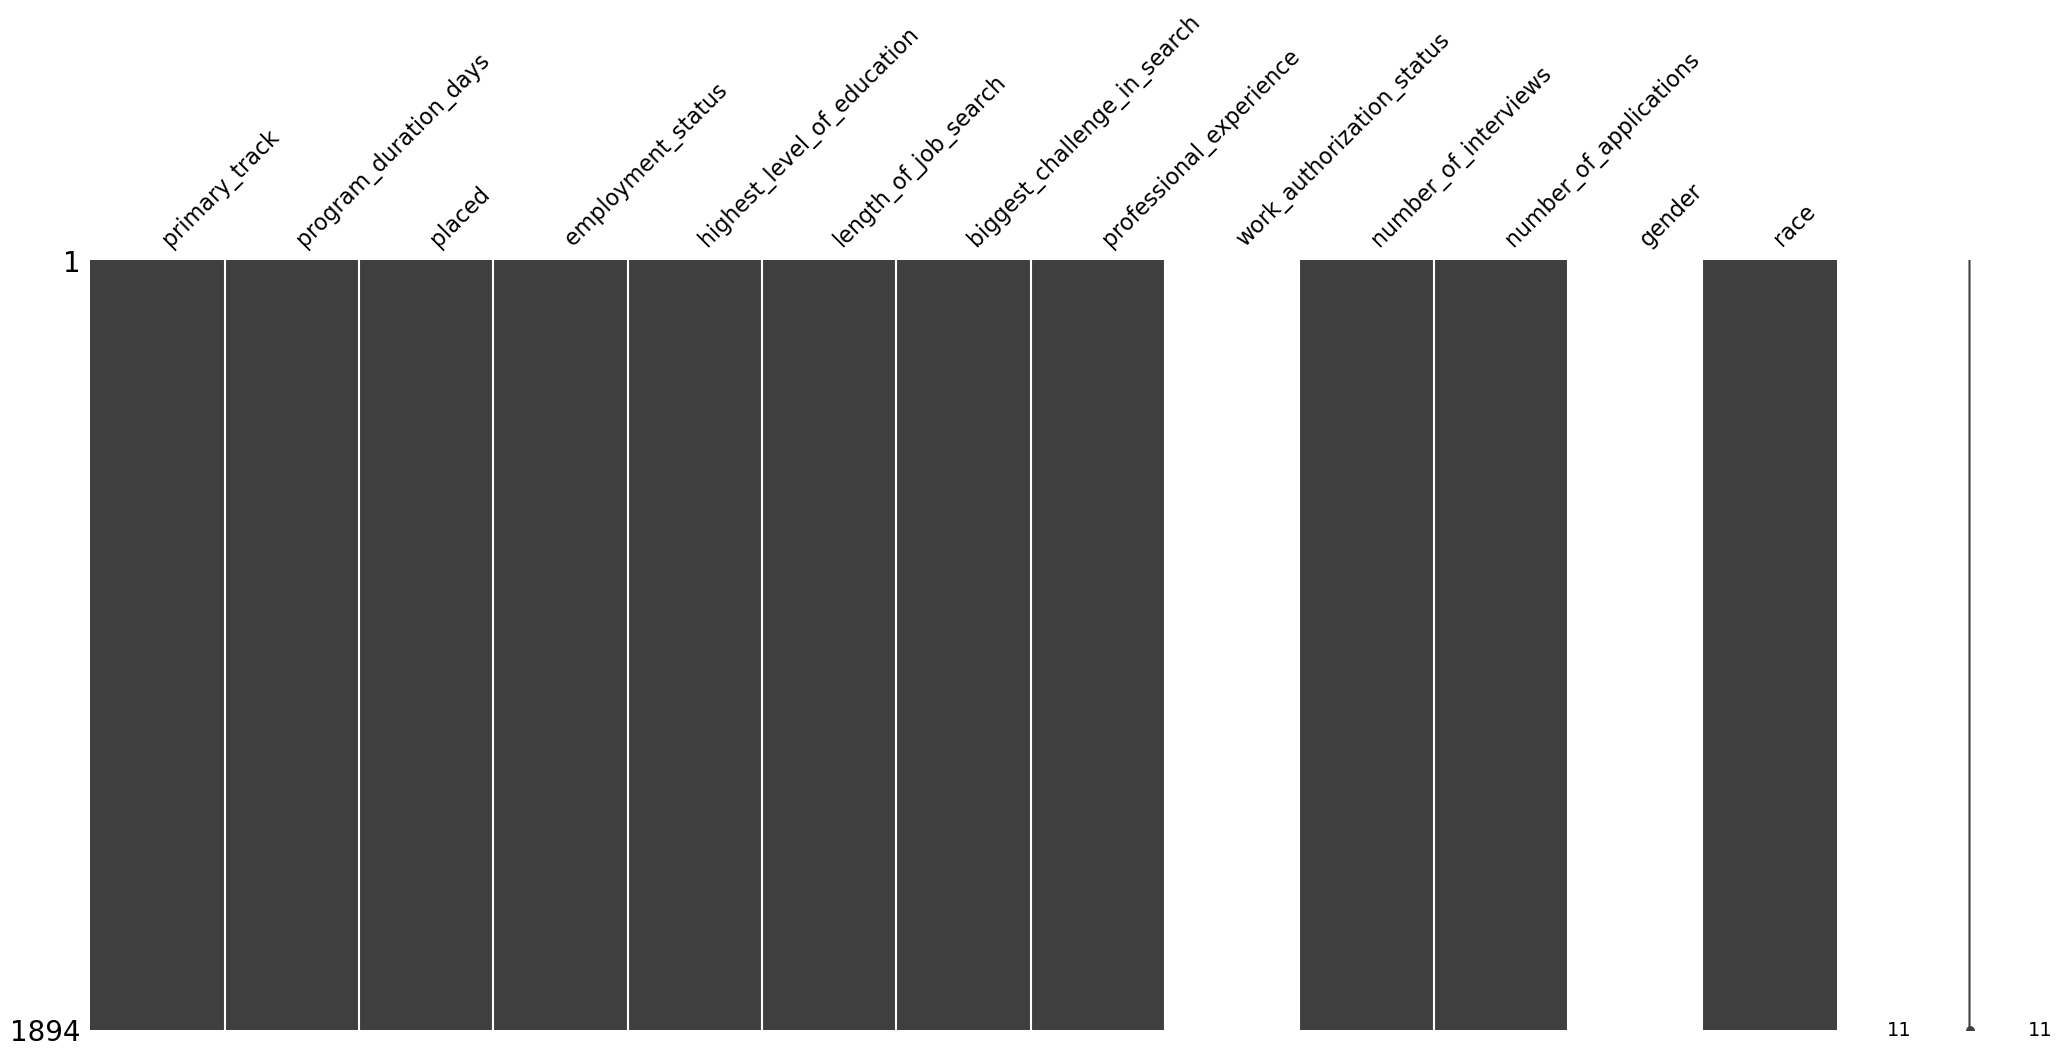

In [53]:
msno.matrix(df)

## Step-5 : get_dummies 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 2 to 2543
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1894 non-null   object 
 1   program_duration_days        1894 non-null   float64
 2   placed                       1894 non-null   int64  
 3   employment_status            1894 non-null   object 
 4   highest_level_of_education   1894 non-null   object 
 5   length_of_job_search         1894 non-null   object 
 6   biggest_challenge_in_search  1894 non-null   object 
 7   professional_experience      1894 non-null   object 
 8   work_authorization_status    0 non-null      object 
 9   number_of_interviews         1894 non-null   float64
 10  number_of_applications       1894 non-null   int64  
 11  gender                       0 non-null      object 
 12  race                         1894 non-null   object 
dtypes: float64(2), int

In [55]:
df_categorical_to_dummies = pd.get_dummies(df[['primary_track','employment_status ', 'highest_level_of_education', 'length_of_job_search','biggest_challenge_in_search','professional_experience','gender','race','work_authorization_status' ]])

In [56]:
df_categorical_to_dummies

,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Student,employment_status _Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,highest_level_of_education_missed,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,length_of_job_search_missed,biggest_challenge_in_search_Behavioral interviewing,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,biggest_challenge_in_search_missed,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Missed,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2538,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2539,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2540,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
df = df.drop(['primary_track','employment_status ', 'highest_level_of_education', 'length_of_job_search','biggest_challenge_in_search','professional_experience','gender','race','work_authorization_status'] , axis=1)

In [58]:
df = pd.concat([df,df_categorical_to_dummies], axis=1)

In [59]:
df

,program_duration_days,placed,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Student,employment_status _Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,highest_level_of_education_missed,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,length_of_job_search_missed,biggest_challenge_in_search_Behavioral interviewing,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,biggest_challenge_in_search_missed,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Missed,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
2,0.0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0.0,0,5.0,25,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,89.0,1,10.0,100,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0.0,0,5.0,100,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6,0.0,0,0.0,9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,0.0,0,0.0,20,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2538,118.0,0,1.0,25,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2539,457.0,0,4.0,15,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2540,488.0,0,1.0,7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 2 to 2543
Data columns (total 54 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             1894 non-null   float64
 1   placed                                                            1894 non-null   int64  
 2   number_of_interviews                                              1894 non-null   float64
 3   number_of_applications                                            1894 non-null   int64  
 4   primary_track_Data                                                1894 non-null   uint8  
 5   primary_track_Design                                              1894 non-null   uint8  
 6   primary_track_Marketing                                           1894 non-null   uint8  
 7   primary_track_PSO                

<AxesSubplot:xlabel='placed', ylabel='count'>

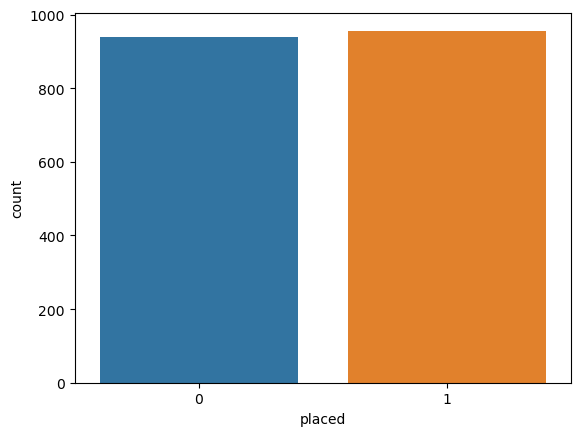

In [61]:
#To check the dataset balance
sns.countplot(x='placed',data=df)

#### We can see that dataset is almost balanced

## Step-6 : Split the Dataset to Test and Train and Standardize

In [62]:
X=df.drop('placed', axis=1)
Y=df['placed']

In [63]:
X

,program_duration_days,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Student,employment_status _Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,highest_level_of_education_missed,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,length_of_job_search_missed,biggest_challenge_in_search_Behavioral interviewing,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,biggest_challenge_in_search_missed,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Missed,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
2,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0.0,5.0,25,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,89.0,10.0,100,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0.0,5.0,100,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6,0.0,0.0,9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,0.0,0.0,20,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2538,118.0,1.0,25,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2539,457.0,4.0,15,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2540,488.0,1.0,7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [64]:
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
x_scaled

array([[-1.10293552, -0.78373855, -0.69547091, ..., -0.52316866,
        -0.52889482, -0.19149971],
       [-1.10293552,  0.99646007, -0.224503  , ..., -0.52316866,
        -0.52889482, -0.19149971],
       [-0.39440333,  2.77665868,  1.18840075, ..., -0.52316866,
        -0.52889482, -0.19149971],
       ...,
       [ 2.53525783,  0.64042034, -0.41289016, ...,  1.91142948,
        -0.52889482, -0.19149971],
       [ 2.78204994, -0.42769883, -0.5635999 , ...,  1.91142948,
        -0.52889482, -0.19149971],
       [ 1.16595968,  0.28438062,  0.62323925, ...,  1.91142948,
        -0.52889482, -0.19149971]])

In [65]:
col=X.columns
X = pd.DataFrame(x_scaled, columns=col)
X

,program_duration_days,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Student,employment_status _Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,highest_level_of_education_missed,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,length_of_job_search_missed,biggest_challenge_in_search_Behavioral interviewing,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,biggest_challenge_in_search_missed,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Missed,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,-1.102936,-0.783739,-0.695471,-0.321071,2.886182,-0.032513,-0.370861,-1.442108,-0.046004,-0.274819,-0.455124,2.918491,-0.804336,-0.593204,-1.074580,-0.236096,-0.086295,-0.079851,1.470353,-0.23734,-0.083134,-0.146884,-0.675961,-0.491074,-0.313003,1.450834,-0.220741,-0.188517,-0.150593,3.698942,-0.373619,-0.301685,-0.284693,-0.786641,-0.317054,-0.126864,-0.361589,-0.115655,-0.103307,-0.705987,-0.548474,-0.344564,1.743095,-0.299597,-0.216766,-0.176150,1.320957,-0.258925,-0.168018,-0.03983,-0.523169,-0.528895,-0.1915
1,-1.102936,0.996460,-0.224503,-0.321071,-0.346478,-0.032513,2.696431,-1.442108,-0.046004,3.638764,-0.455124,-0.342643,-0.804336,-0.593204,0.930597,-0.236096,-0.086295,-0.079851,-0.680109,-0.23734,-0.083134,-0.146884,-0.675961,-0.491074,-0.313003,1.450834,-0.220741,-0.188517,-0.150593,-0.270348,2.676526,-0.301685,-0.284693,-0.786641,-0.317054,-0.126864,-0.361589,-0.115655,-0.103307,-0.705987,-0.548474,-0.344564,1.743095,-0.299597,-0.216766,5.676977,-0.757027,-0.258925,-0.168018,-0.03983,-0.523169,-0.528895,-0.1915
2,-0.394403,2.776659,1.188401,-0.321071,-0.346478,-0.032513,-0.370861,0.693429,-0.046004,-0.274819,-0.455124,-0.342643,-0.804336,1.685759,0.930597,-0.236096,-0.086295,-0.079851,-0.680109,-0.23734,-0.083134,-0.146884,1.479376,-0.491074,-0.313003,-0.689259,-0.220741,-0.188517,-0.150593,-0.270348,-0.373619,-0.301685,-0.284693,1.271229,-0.317054,-0.126864,-0.361589,-0.115655,-0.103307,1.416457,-0.548474,-0.344564,-0.573692,-0.299597,-0.216766,-0.176150,1.320957,-0.258925,-0.168018,-0.03983,-0.523169,-0.528895,-0.1915
3,-1.102936,0.996460,1.188401,-0.321071,-0.346478,-0.032513,-0.370861,0.693429,-0.046004,-0.274819,2.197201,-0.342643,-0.804336,-0.593204,-1.074580,-0.236096,-0.086295,-0.079851,1.470353,-0.23734,-0.083134,-0.146884,1.479376,-0.491074,-0.313003,-0.689259,-0.220741,-0.188517,-0.150593,-0.270348,-0.373619,-0.301685,-0.284693,-0.786641,-0.317054,-0.126864,2.765574,-0.115655,-0.103307,-0.705987,1.823239,-0.344564,-0.573692,-0.299597

#### Train_Test_split

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

## Step-7 : Machine Learning Models

### This function is to plot the confusion matrix for the project.

In [67]:
def plot_confusion_matrix(y,y_predict):
    
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not hired', 'hired']); 
    ax.yaxis.set_ticklabels(['did not hired', 'hired'])
    plt.show()

## Logistic Regression

In [68]:
lr=LogisticRegression()
parameters ={"C":[0.01,0.1,1]}
lr_cv = GridSearchCV(lr, parameters,cv=10)
lr_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1]})

In [69]:
print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01}
accuracy : 0.5924584187742082


In [70]:
accu=[]
methods=[]
accu.append(lr_cv.score(X_test,Y_test))
methods.append('logistic regression')
lr_cv.score(X_test,Y_test)

0.5729349736379613

### Confusion Matrix

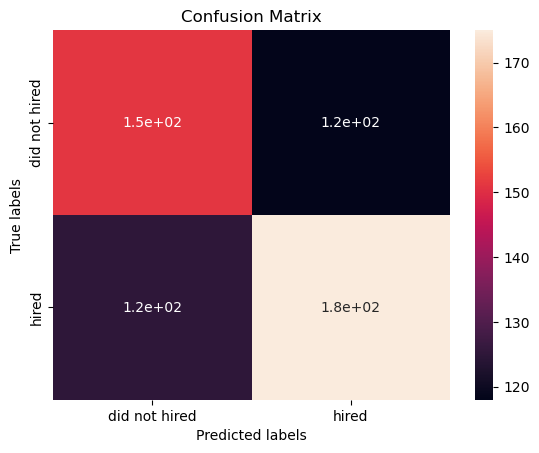

In [71]:
y_predict = lr_cv.predict(X_test)
plot_confusion_matrix(Y_test,y_predict)

### Accuracy Score

In [72]:
accuracy_score(Y_test,y_predict , normalize = False)

326

In [73]:
accuracy_score(Y_test,y_predict , normalize = True)

0.5729349736379613

### Classification Report

In [74]:
print(classification_report(Y_test,y_predict ))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55       269
           1       0.60      0.58      0.59       300

    accuracy                           0.57       569
   macro avg       0.57      0.57      0.57       569
weighted avg       0.57      0.57      0.57       569



## K Nearest Neighbors (KNN)

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
KNN = KNeighborsClassifier()
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN_cv = GridSearchCV(KNN ,parameters, cv=10 )
KNN_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [77]:
print("tuned hpyerparameters :(best parameters) ", KNN_cv.best_params_)
print("accuracy :", KNN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
accuracy : 0.5683014354066985


In [78]:
accu.append(KNN_cv.score(X_test,Y_test))
methods.append('K Nearest Neighbors')
KNN_cv.score(X_test,Y_test)

0.5588752196836555

### Confusion Matrix

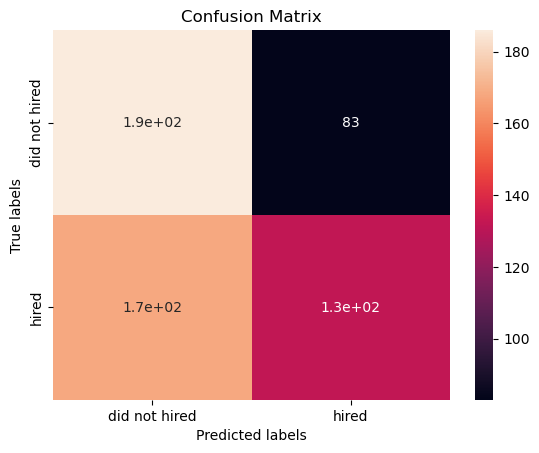

In [79]:
y_predict = KNN_cv.predict(X_test)
plot_confusion_matrix(Y_test,y_predict)

### Accuracy Score

In [80]:
accuracy_score(Y_test,y_predict , normalize = False)

318

In [81]:
accuracy_score(Y_test,y_predict , normalize = True)

0.5588752196836555

### Classification Report

In [82]:
print(classification_report(Y_test,y_predict ))

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       269
           1       0.61      0.44      0.51       300

    accuracy                           0.56       569
   macro avg       0.57      0.57      0.55       569
weighted avg       0.57      0.56      0.55       569



## Support Vector Machine (SVM)

In [83]:
svm = SVC()
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'C': [0.5, 1, 1.5]}
svm_cv = GridSearchCV(svm , parameters , cv=10 )
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.5, 1, 1.5],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [84]:
print("tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.5, 'kernel': 'sigmoid'}
accuracy : 0.6022898154477103


In [85]:
accu.append(svm_cv.score(X_test,Y_test))
methods.append('support vector machine')
svm_cv.score(X_test,Y_test)

0.5957820738137083

### Confusion Matrix

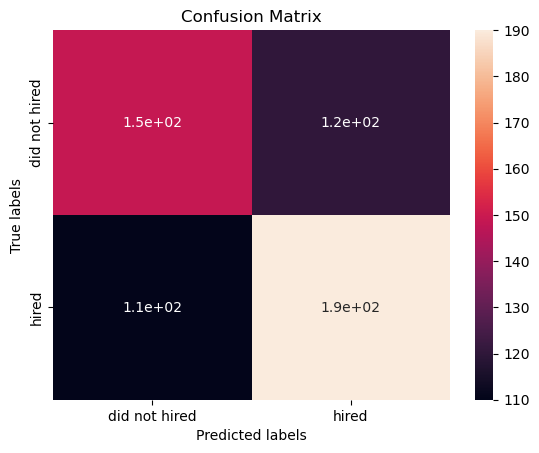

In [86]:
y_predict = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,y_predict)

### Accuracy Score

In [87]:
accuracy_score(Y_test,y_predict , normalize = False)

339

In [88]:
accuracy_score(Y_test,y_predict , normalize = True)

0.5957820738137083

### Classification Report

In [89]:
print(classification_report(Y_test,y_predict ))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56       269
           1       0.61      0.63      0.62       300

    accuracy                           0.60       569
   macro avg       0.59      0.59      0.59       569
weighted avg       0.60      0.60      0.60       569



## Decision Trees

In [90]:
tree = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [91]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.7064080656185919


In [92]:
accu.append(tree_cv.score(X_test,Y_test))
methods.append('decision tree classifier')
tree_cv.score(X_test,Y_test)

0.616871704745167

### Confusion Matrix

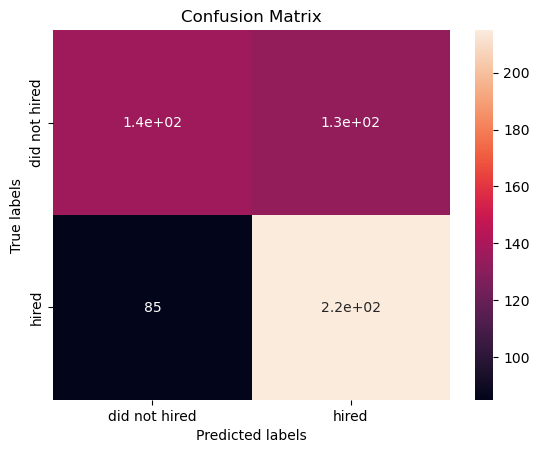

In [93]:
y_predict = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,y_predict)

### Accuracy Score

In [94]:
accuracy_score(Y_test,y_predict , normalize = False)

351

In [95]:
accuracy_score(Y_test,y_predict , normalize = True)

0.616871704745167

### Classification Report

In [96]:
print(classification_report(Y_test,y_predict ))

              precision    recall  f1-score   support

           0       0.62      0.51      0.56       269
           1       0.62      0.72      0.66       300

    accuracy                           0.62       569
   macro avg       0.62      0.61      0.61       569
weighted avg       0.62      0.62      0.61       569



### Random Forest

In [97]:
rf = RandomForestClassifier()
parameters = {'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],  'n_estimators': [10,20,30] }

rf_cv = GridSearchCV(rf, parameters)
rf_cv.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]})

In [98]:
print("tuned hpyerparameters :(best parameters) ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 30}
accuracy : 0.7215094339622641


In [99]:
accu.append(rf_cv.score(X_test,Y_test))
methods.append('Random Forest')
rf_cv.score(X_test,Y_test)

0.7697715289982425

### Confusion Matrix

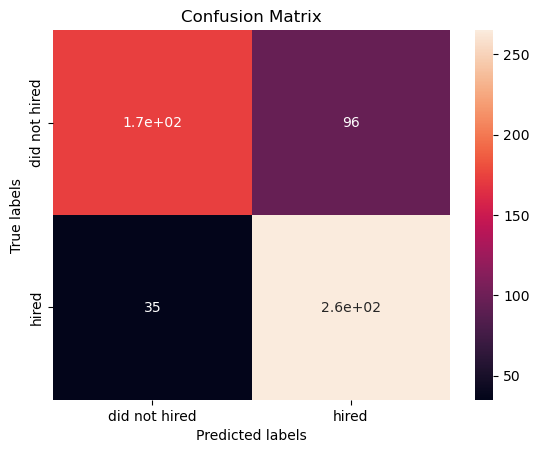

In [100]:
y_predict = rf_cv.predict(X_test)
plot_confusion_matrix(Y_test,y_predict)

### Accuracy Score

In [101]:
accuracy_score(Y_test,y_predict , normalize = False)

438

In [102]:
accuracy_score(Y_test,y_predict , normalize = True)

0.7697715289982425

## comparing models and fint the best method performance

In [103]:
print(methods)
print(accu)

['logistic regression', 'K Nearest Neighbors', 'support vector machine', 'decision tree classifier', 'Random Forest']
[0.5729349736379613, 0.5588752196836555, 0.5957820738137083, 0.616871704745167, 0.7697715289982425]


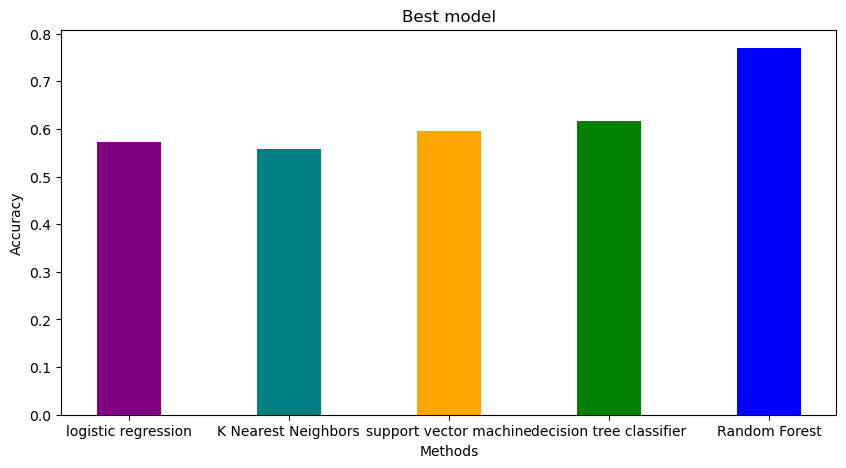

In [104]:
fig = plt.figure(figsize=(10,5))

colors = ['purple', 'teal', 'orange', 'green', 'blue']

plt.bar(methods, accu, color=colors,  width=0.4)

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best model")
plt.show()



### ROC Curve

In [105]:
import warnings
from sklearn.exceptions import DataConversionWarning

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

# your code using KNN algorithm



## Initializing models, model_names and evaluation metrics
models = [lr_cv,svm_cv, KNN_cv, tree_cv, rf_cv]
model_names = ['LR', 'KNN', 'SVM', 'DT', 'RF']
accuracies = []
confusion_matrices = []
fprs = []
tprs = []
aucs = []

## Loop through models to make predictions using each model
for model in models:
    y_pred = model.predict(X_test)
    ## store evaluation metrics of each model
    accuracies.append(accuracy_score(Y_test, y_pred))
    confusion_matrices.append(confusion_matrix(Y_test, y_pred))
    fpr, tpr, _ = roc_curve(Y_test, y_pred)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc(fpr, tpr))

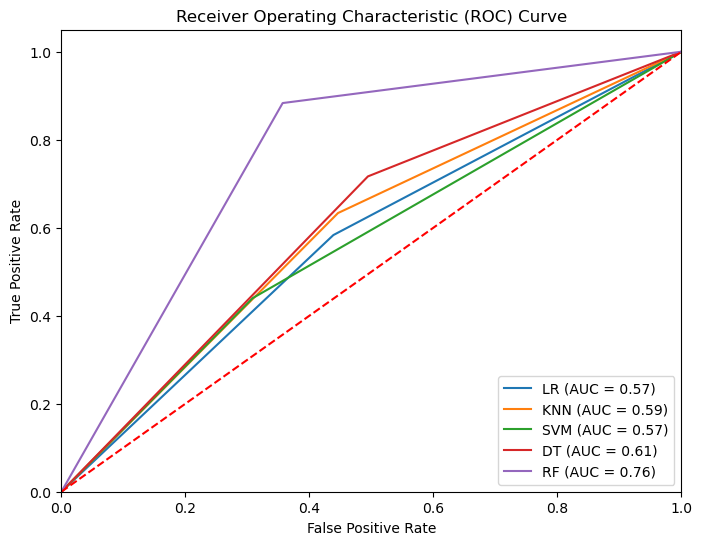

In [106]:
plt.figure(figsize=(8,6))
for i in range(len(models)):
    plt.plot(fprs[i], tprs[i], label=model_names[i] + " (AUC = {:.2f})".format(aucs[i]))
plt.plot([0, 1], [0, 1], 'k--', color="red")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()